In [1]:
import pickle


def process_director_actor(s):

    if not s:
        return '', ''

    s = s[0].text
    s = s.replace('\n', '')

    if "Director" in s and "Star" in s:
        s = s.replace('Directors:', '').replace('Director:', '')
        s = s.replace('Stars:', '').replace('Star:', '')
        s = s.split('|')
        s = [x.strip() if x else '' for x in s]
    elif "Director" in s and "Star" not in s:
        s = s.replace('Directors:', '').replace('Director:', '')
        s = [s.strip(), '']
    elif "Director" not in s and "Star" in s:
        s = s.replace('Stars:', '').replace('Star:', '')
        s = ['', s.strip()]
    else:
        s = ['', '']

    return s


def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)


def process_url_to_key(url):
    url = url.replace('/title/', '')
    pos = url.find('/')
    id = url[0:pos]
    return id


def process_text(s):
    s = s.replace('\n', '')
    s = s.strip()
    return s




In [183]:
from preprocessing import *
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
df = load_obj("toy_example")

In [4]:
df_dataframe = pd.DataFrame(df)

In [5]:
df_dataframe

,tt4682266,tt7178640,tt10350922,tt6723592,tt7737786,tt7212754,tt7846844,tt4633694,tt2222042,tt8367814,...,tt11671006,tt0800369,tt0451279,tt0369610,tt5433138,tt2381249,tt8688634,tt1190080,tt6850820,tt0425112
0,The New Mutants,Superintelligence,Laxmii,Tenet,Greenland,Ludo,Enola Holmes,Spider-Man: Into the Spider-Verse,Love and Monsters,The Gentlemen,...,The Man from Toronto,Thor,Wonder Woman,Jurassic World,F9,Mission: Impossible - Rogue Nation,21 Bridges,2012,Peppermint,Hot Fuzz
1,(2020),(2020),(2020),(2020),(2020),(2020),(2020),(2018),(2020),(2019),...,(2021),(2011),(2017),(2015),(2021),(2015),(2019),(I) (2009),(2018),(2007)
2,PG-13,PG,TV-MA,PG-13,PG-13,TV-MA,PG-13,PG,PG-13,R,...,,PG-13,PG-13,PG-13,PG-13,PG-13,R,PG-13,R,R
3,94 min,106 min,141 min,150 min,119 min,149 min,123 min,117 min,109 min,113 min,...,,115 min,141 min,124 min,145 min,131 min,99 min,158 min,101 min,121 min
4,"Action, Horror, Sci-Fi","Action, Comedy","Action, Comedy, Horror","Action, Sci-Fi","Action, Drama, Thriller","Action, Comedy, Crime","Action, Adventure, Crime","Animation, Action, Adventure","Action, Adventure, Comedy","Action, Comedy, Crime",...,"Action, Comedy","Action, Adventure, Fantasy","Action, Adventure, Fantasy","Action, Adventure, Sci-Fi","Action, Adventure, Crime","Action, Adventure, Thriller","Action, Crime, Thriller","Action, Adventure, Sci-Fi","Action, Drama, Thriller","Action, Comedy, Mystery"
5,5.3,,2.2,7.8,6.3,7.6,6.6,8.4,7.0,7.8,...,,7.0,7.4,7.0,,7.4,6.6,5.8,6.5,7.8
6,43,,,69,,,68,87,59,51,...,,57,76,59,,75,51,49,29,81
7,"26,148",,"40,700","146,606","18,139","17,190","104,177","354,186","19,107","206,052",...,,"738,141","542,423","574,099",,"338,172","45,344","349,992","51,320","458,779"
8,,,,$53.80M,,,,$190.24M,,,...,,$181.03M,$412.56M,$652.27M,,$195.04M,,$166.11M,$35.42M,$23.64M
9,Josh Boone,,"Lawrence Raghavendra, Balakrishnan Thevar",Christopher Nolan,Ric Roman Waugh,Anurag Basu,Harry Bradbeer,"Bob Persichetti, Peter Ramsey, Rodney Rothman",Michael Matthews,Guy Ritchie,...,,Kenneth Branagh,Patty Jenkins,Colin Trevorrow,,Christopher McQuarrie,Brian Kirk,Roland Emmerich,Pierre Morel,Edgar Wright


In [6]:
df_dataframe1 = np.transpose(df_dataframe)

In [7]:
df_dataframe1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
tt4682266,The New Mutants,(2020),PG-13,94 min,"Action, Horror, Sci-Fi",5.3,43,"26,148",,Josh Boone,"Maisie Williams, Anya Taylor-Joy, Charlie Heat...","[tt7737786, tt2222042, tt10059518, tt4685762, ...",[After a near-death experience during a strang...,"[[, Who said this is Horror ???! After the rep..."
tt7178640,Superintelligence,(2020),PG,106 min,"Action, Comedy",,,,,,,"[tt13315308, tt7212754]",[Nothing extraordinary ever happens to Carol P...,[]
tt10350922,Laxmii,(2020),TV-MA,141 min,"Action, Comedy, Horror",2.2,,"40,700",,"Lawrence Raghavendra, Balakrishnan Thevar","Akshay Kumar, Kiara Advani, Sharad Kelkar, Ash...","[tt8983164, tt7212754, tt2034026, tt7721946, t...",[The film deals with a ghost seeking vengeance...,"[[1, Southern make was much better.Kindly copy..."
tt6723592,Tenet,(2020),PG-13,150 min,"Action, Sci-Fi",7.8,69,"146,606",$53.80M,Christopher Nolan,"John David Washington, Robert Pattinson, Eliza...","[tt1375666, tt0816692, tt7131622, tt8367814, t...",[In a twilight world of international espionag...,"[[8, Its somewhat ironic that a movie about ti..."
tt7737786,Greenland,(2020),PG-13,119 min,"Action, Drama, Thriller",6.3,,"18,139",,Ric Roman Waugh,"Gerard Butler, Morena Baccarin, Roger Dale Flo...","[tt10059518, tt8710596, tt2222042, tt4682266, ...",[A family fights for survival as a planet-kill...,"[[8, We went tonight, my girlfriend and I, as ..."


In [8]:
df_dataframe1.columns =['title', 'year', 'content_rating', 'length', 'genres', 'score', 'metascore', 'vote_numbers',
                       'gross', 'director', 'actors', 'related_movie', 'storyline', 'reviews'] 

In [9]:
df_dataframe1.head()

,title,year,content_rating,length,genres,score,metascore,vote_numbers,gross,director,actors,related_movie,storyline,reviews
tt4682266,The New Mutants,(2020),PG-13,94 min,"Action, Horror, Sci-Fi",5.3,43,"26,148",,Josh Boone,"Maisie Williams, Anya Taylor-Joy, Charlie Heat...","[tt7737786, tt2222042, tt10059518, tt4685762, ...",[After a near-death experience during a strang...,"[[, Who said this is Horror ???! After the rep..."
tt7178640,Superintelligence,(2020),PG,106 min,"Action, Comedy",,,,,,,"[tt13315308, tt7212754]",[Nothing extraordinary ever happens to Carol P...,[]
tt10350922,Laxmii,(2020),TV-MA,141 min,"Action, Comedy, Horror",2.2,,"40,700",,"Lawrence Raghavendra, Balakrishnan Thevar","Akshay Kumar, Kiara Advani, Sharad Kelkar, Ash...","[tt8983164, tt7212754, tt2034026, tt7721946, t...",[The film deals with a ghost seeking vengeance...,"[[1, Southern make was much better.Kindly copy..."
tt6723592,Tenet,(2020),PG-13,150 min,"Action, Sci-Fi",7.8,69,"146,606",$53.80M,Christopher Nolan,"John David Washington, Robert Pattinson, Eliza...","[tt1375666, tt0816692, tt7131622, tt8367814, t...",[In a twilight world of international espionag...,"[[8, Its somewhat ironic that a movie about ti..."
tt7737786,Greenland,(2020),PG-13,119 min,"Action, Drama, Thriller",6.3,,"18,139",,Ric Roman Waugh,"Gerard Butler, Morena Baccarin, Roger Dale Flo...","[tt10059518, tt8710596, tt2222042, tt4682266, ...",[A family fights for survival as a planet-kill...,"[[8, We went tonight, my girlfriend and I, as ..."


In [10]:
# delete () in year col
df_dataframe1['year'] = [df_dataframe1['year'][i][1:-1] for i in range(len(df_dataframe1['year']))]

In [11]:
df_dataframe1

,title,year,content_rating,length,genres,score,metascore,vote_numbers,gross,director,actors,related_movie,storyline,reviews
tt4682266,The New Mutants,2020,PG-13,94 min,"Action, Horror, Sci-Fi",5.3,43,"26,148",,Josh Boone,"Maisie Williams, Anya Taylor-Joy, Charlie Heat...","[tt7737786, tt2222042, tt10059518, tt4685762, ...",[After a near-death experience during a strang...,"[[, Who said this is Horror ???! After the rep..."
tt7178640,Superintelligence,2020,PG,106 min,"Action, Comedy",,,,,,,"[tt13315308, tt7212754]",[Nothing extraordinary ever happens to Carol P...,[]
tt10350922,Laxmii,2020,TV-MA,141 min,"Action, Comedy, Horror",2.2,,"40,700",,"Lawrence Raghavendra, Balakrishnan Thevar","Akshay Kumar, Kiara Advani, Sharad Kelkar, Ash...","[tt8983164, tt7212754, tt2034026, tt7721946, t...",[The film deals with a ghost seeking vengeance...,"[[1, Southern make was much better.Kindly copy..."
tt6723592,Tenet,2020,PG-13,150 min,"Action, Sci-Fi",7.8,69,"146,606",$53.80M,Christopher Nolan,"John David Washington, Robert Pattinson, Eliza...","[tt1375666, tt0816692, tt7131622, tt8367814, t...",[In a twilight world of international espionag...,"[[8, Its somewhat ironic that a movie about ti..."
tt7737786,Greenland,2020,PG-13,119 min,"Action, Drama, Thriller",6.3,,"18,139",,Ric Roman Waugh,"Gerard Butler, Morena Baccarin, Roger Dale Flo...","[tt10059518, tt8710596, tt2222042, tt4682266, ...",[A family fights for survival as a planet-kill...,"[[8, We went tonight, my girlfriend and I, as ..."
tt7212754,Ludo,2020,TV-MA,149 min,"Action, Comedy, Crime",7.6,,"17,190",,Anurag Basu,"Pankaj Tripathi, Abhishek Bachchan, Rajkummar ...","[tt8983164, tt6473300, tt12392504, tt10515526,...",[From a resurfaced sex tape to a rogue suitcas...,"[[10, This movie feels like a movie made on in..."
tt7846844,Enola Holmes,2020,PG-13,123 min,"Action, Adventure, Crime",6.6,68,"104,177",,Harry Bradbeer,"Millie Bobby Brown, Henry Cavill, Sam Claflin,...","[tt10682266, tt10436228, tt11276598, tt8524650...","[England, 1884 - a world on the brink of chang...","[[8, This is the movie I wish I had at 15. Thi..."
tt4633694,Spider-Man: Into the Spider-Verse,2018,PG,117 min,"Animation, Action, Adventure",8.4,87,"354,186",$190.24M,"Bob Persichetti, Peter Ramsey, Rodney Rothman","Shameik Moore, Jake Johnson, Hailee Steinfeld,...","[tt2380307, tt0910970, tt0114709, tt0110357, t...",[Miles Morales is a New York teen struggling w...,"[[10, I have to say, and no pun-intended: Into..."
tt2222042,Love and Monsters,2020,PG-13,109 min,"Action, Adventure, Comedy",7.0,59,"19,107",,Michael Matthews,"Dylan O'Brien, Jessica Henwick, Michael Rooker...","[tt7737786, tt4682266, tt10059518, tt7846844, ...","[Seven years after the Monsterpocalypse, Joel ...","[[8, It's not the most expensive movie, or the..."
tt8367814,The Gentlemen,2019,R,113 min,"Action, Comedy, Crime",7.8,51,"206,052",,Guy Ritchie,"Matthew McConaughey, Charlie Hunnam, Michelle ...","[tt8946378, tt7131622, tt8579674, tt6751668, t...","[A talented American graduate of Oxford, using...","[[9, The writing, directing, acting and the ge..."


In [12]:
# delete min in length col
df_dataframe1['length'] = [df_dataframe1['length'][i][:-3] for i in range(len(df_dataframe1['length']))]

In [13]:
df_dataframe1

,title,year,content_rating,length,genres,score,metascore,vote_numbers,gross,director,actors,related_movie,storyline,reviews
tt4682266,The New Mutants,2020,PG-13,94,"Action, Horror, Sci-Fi",5.3,43,"26,148",,Josh Boone,"Maisie Williams, Anya Taylor-Joy, Charlie Heat...","[tt7737786, tt2222042, tt10059518, tt4685762, ...",[After a near-death experience during a strang...,"[[, Who said this is Horror ???! After the rep..."
tt7178640,Superintelligence,2020,PG,106,"Action, Comedy",,,,,,,"[tt13315308, tt7212754]",[Nothing extraordinary ever happens to Carol P...,[]
tt10350922,Laxmii,2020,TV-MA,141,"Action, Comedy, Horror",2.2,,"40,700",,"Lawrence Raghavendra, Balakrishnan Thevar","Akshay Kumar, Kiara Advani, Sharad Kelkar, Ash...","[tt8983164, tt7212754, tt2034026, tt7721946, t...",[The film deals with a ghost seeking vengeance...,"[[1, Southern make was much better.Kindly copy..."
tt6723592,Tenet,2020,PG-13,150,"Action, Sci-Fi",7.8,69,"146,606",$53.80M,Christopher Nolan,"John David Washington, Robert Pattinson, Eliza...","[tt1375666, tt0816692, tt7131622, tt8367814, t...",[In a twilight world of international espionag...,"[[8, Its somewhat ironic that a movie about ti..."
tt7737786,Greenland,2020,PG-13,119,"Action, Drama, Thriller",6.3,,"18,139",,Ric Roman Waugh,"Gerard Butler, Morena Baccarin, Roger Dale Flo...","[tt10059518, tt8710596, tt2222042, tt4682266, ...",[A family fights for survival as a planet-kill...,"[[8, We went tonight, my girlfriend and I, as ..."
tt7212754,Ludo,2020,TV-MA,149,"Action, Comedy, Crime",7.6,,"17,190",,Anurag Basu,"Pankaj Tripathi, Abhishek Bachchan, Rajkummar ...","[tt8983164, tt6473300, tt12392504, tt10515526,...",[From a resurfaced sex tape to a rogue suitcas...,"[[10, This movie feels like a movie made on in..."
tt7846844,Enola Holmes,2020,PG-13,123,"Action, Adventure, Crime",6.6,68,"104,177",,Harry Bradbeer,"Millie Bobby Brown, Henry Cavill, Sam Claflin,...","[tt10682266, tt10436228, tt11276598, tt8524650...","[England, 1884 - a world on the brink of chang...","[[8, This is the movie I wish I had at 15. Thi..."
tt4633694,Spider-Man: Into the Spider-Verse,2018,PG,117,"Animation, Action, Adventure",8.4,87,"354,186",$190.24M,"Bob Persichetti, Peter Ramsey, Rodney Rothman","Shameik Moore, Jake Johnson, Hailee Steinfeld,...","[tt2380307, tt0910970, tt0114709, tt0110357, t...",[Miles Morales is a New York teen struggling w...,"[[10, I have to say, and no pun-intended: Into..."
tt2222042,Love and Monsters,2020,PG-13,109,"Action, Adventure, Comedy",7.0,59,"19,107",,Michael Matthews,"Dylan O'Brien, Jessica Henwick, Michael Rooker...","[tt7737786, tt4682266, tt10059518, tt7846844, ...","[Seven years after the Monsterpocalypse, Joel ...","[[8, It's not the most expensive movie, or the..."
tt8367814,The Gentlemen,2019,R,113,"Action, Comedy, Crime",7.8,51,"206,052",,Guy Ritchie,"Matthew McConaughey, Charlie Hunnam, Michelle ...","[tt8946378, tt7131622, tt8579674, tt6751668, t...","[A talented American graduate of Oxford, using...","[[9, The writing, directing, acting and the ge..."


In [14]:
# metascore is the score from professional movie magazines

In [15]:
# delete $ and M in gross col
df_dataframe1['gross'] = [df_dataframe1['gross'][i][1:-1] for i in range(len(df_dataframe1['gross']))]

In [16]:
df_dataframe1

,title,year,content_rating,length,genres,score,metascore,vote_numbers,gross,director,actors,related_movie,storyline,reviews
tt4682266,The New Mutants,2020,PG-13,94,"Action, Horror, Sci-Fi",5.3,43,"26,148",,Josh Boone,"Maisie Williams, Anya Taylor-Joy, Charlie Heat...","[tt7737786, tt2222042, tt10059518, tt4685762, ...",[After a near-death experience during a strang...,"[[, Who said this is Horror ???! After the rep..."
tt7178640,Superintelligence,2020,PG,106,"Action, Comedy",,,,,,,"[tt13315308, tt7212754]",[Nothing extraordinary ever happens to Carol P...,[]
tt10350922,Laxmii,2020,TV-MA,141,"Action, Comedy, Horror",2.2,,"40,700",,"Lawrence Raghavendra, Balakrishnan Thevar","Akshay Kumar, Kiara Advani, Sharad Kelkar, Ash...","[tt8983164, tt7212754, tt2034026, tt7721946, t...",[The film deals with a ghost seeking vengeance...,"[[1, Southern make was much better.Kindly copy..."
tt6723592,Tenet,2020,PG-13,150,"Action, Sci-Fi",7.8,69,"146,606",53.80,Christopher Nolan,"John David Washington, Robert Pattinson, Eliza...","[tt1375666, tt0816692, tt7131622, tt8367814, t...",[In a twilight world of international espionag...,"[[8, Its somewhat ironic that a movie about ti..."
tt7737786,Greenland,2020,PG-13,119,"Action, Drama, Thriller",6.3,,"18,139",,Ric Roman Waugh,"Gerard Butler, Morena Baccarin, Roger Dale Flo...","[tt10059518, tt8710596, tt2222042, tt4682266, ...",[A family fights for survival as a planet-kill...,"[[8, We went tonight, my girlfriend and I, as ..."
tt7212754,Ludo,2020,TV-MA,149,"Action, Comedy, Crime",7.6,,"17,190",,Anurag Basu,"Pankaj Tripathi, Abhishek Bachchan, Rajkummar ...","[tt8983164, tt6473300, tt12392504, tt10515526,...",[From a resurfaced sex tape to a rogue suitcas...,"[[10, This movie feels like a movie made on in..."
tt7846844,Enola Holmes,2020,PG-13,123,"Action, Adventure, Crime",6.6,68,"104,177",,Harry Bradbeer,"Millie Bobby Brown, Henry Cavill, Sam Claflin,...","[tt10682266, tt10436228, tt11276598, tt8524650...","[England, 1884 - a world on the brink of chang...","[[8, This is the movie I wish I had at 15. Thi..."
tt4633694,Spider-Man: Into the Spider-Verse,2018,PG,117,"Animation, Action, Adventure",8.4,87,"354,186",190.24,"Bob Persichetti, Peter Ramsey, Rodney Rothman","Shameik Moore, Jake Johnson, Hailee Steinfeld,...","[tt2380307, tt0910970, tt0114709, tt0110357, t...",[Miles Morales is a New York teen struggling w...,"[[10, I have to say, and no pun-intended: Into..."
tt2222042,Love and Monsters,2020,PG-13,109,"Action, Adventure, Comedy",7.0,59,"19,107",,Michael Matthews,"Dylan O'Brien, Jessica Henwick, Michael Rooker...","[tt7737786, tt4682266, tt10059518, tt7846844, ...","[Seven years after the Monsterpocalypse, Joel ...","[[8, It's not the most expensive movie, or the..."
tt8367814,The Gentlemen,2019,R,113,"Action, Comedy, Crime",7.8,51,"206,052",,Guy Ritchie,"Matthew McConaughey, Charlie Hunnam, Michelle ...","[tt8946378, tt7131622, tt8579674, tt6751668, t...","[A talented American graduate of Oxford, using...","[[9, The writing, directing, acting and the ge..."


In [17]:
# change storyline from list to str
df_dataframe1['storyline'] = [''.join(df_dataframe1['storyline'][i]) for i in range(len(df_dataframe1['storyline']))]

In [18]:
df_dataframe1

,title,year,content_rating,length,genres,score,metascore,vote_numbers,gross,director,actors,related_movie,storyline,reviews
tt4682266,The New Mutants,2020,PG-13,94,"Action, Horror, Sci-Fi",5.3,43,"26,148",,Josh Boone,"Maisie Williams, Anya Taylor-Joy, Charlie Heat...","[tt7737786, tt2222042, tt10059518, tt4685762, ...",After a near-death experience during a strange...,"[[, Who said this is Horror ???! After the rep..."
tt7178640,Superintelligence,2020,PG,106,"Action, Comedy",,,,,,,"[tt13315308, tt7212754]",Nothing extraordinary ever happens to Carol Pe...,[]
tt10350922,Laxmii,2020,TV-MA,141,"Action, Comedy, Horror",2.2,,"40,700",,"Lawrence Raghavendra, Balakrishnan Thevar","Akshay Kumar, Kiara Advani, Sharad Kelkar, Ash...","[tt8983164, tt7212754, tt2034026, tt7721946, t...",The film deals with a ghost seeking vengeance ...,"[[1, Southern make was much better.Kindly copy..."
tt6723592,Tenet,2020,PG-13,150,"Action, Sci-Fi",7.8,69,"146,606",53.80,Christopher Nolan,"John David Washington, Robert Pattinson, Eliza...","[tt1375666, tt0816692, tt7131622, tt8367814, t...",In a twilight world of international espionage...,"[[8, Its somewhat ironic that a movie about ti..."
tt7737786,Greenland,2020,PG-13,119,"Action, Drama, Thriller",6.3,,"18,139",,Ric Roman Waugh,"Gerard Butler, Morena Baccarin, Roger Dale Flo...","[tt10059518, tt8710596, tt2222042, tt4682266, ...",A family fights for survival as a planet-killi...,"[[8, We went tonight, my girlfriend and I, as ..."
tt7212754,Ludo,2020,TV-MA,149,"Action, Comedy, Crime",7.6,,"17,190",,Anurag Basu,"Pankaj Tripathi, Abhishek Bachchan, Rajkummar ...","[tt8983164, tt6473300, tt12392504, tt10515526,...",From a resurfaced sex tape to a rogue suitcase...,"[[10, This movie feels like a movie made on in..."
tt7846844,Enola Holmes,2020,PG-13,123,"Action, Adventure, Crime",6.6,68,"104,177",,Harry Bradbeer,"Millie Bobby Brown, Henry Cavill, Sam Claflin,...","[tt10682266, tt10436228, tt11276598, tt8524650...","England, 1884 - a world on the brink of change...","[[8, This is the movie I wish I had at 15. Thi..."
tt4633694,Spider-Man: Into the Spider-Verse,2018,PG,117,"Animation, Action, Adventure",8.4,87,"354,186",190.24,"Bob Persichetti, Peter Ramsey, Rodney Rothman","Shameik Moore, Jake Johnson, Hailee Steinfeld,...","[tt2380307, tt0910970, tt0114709, tt0110357, t...",Miles Morales is a New York teen struggling wi...,"[[10, I have to say, and no pun-intended: Into..."
tt2222042,Love and Monsters,2020,PG-13,109,"Action, Adventure, Comedy",7.0,59,"19,107",,Michael Matthews,"Dylan O'Brien, Jessica Henwick, Michael Rooker...","[tt7737786, tt4682266, tt10059518, tt7846844, ...","Seven years after the Monsterpocalypse, Joel D...","[[8, It's not the most expensive movie, or the..."
tt8367814,The Gentlemen,2019,R,113,"Action, Comedy, Crime",7.8,51,"206,052",,Guy Ritchie,"Matthew McConaughey, Charlie Hunnam, Michelle ...","[tt8946378, tt7131622, tt8579674, tt6751668, t...","A talented American graduate of Oxford, using ...","[[9, The writing, directing, acting and the ge..."


In [19]:
# special case with year col where some rows are eg. 'I) (2019'
for i in range(len(df_dataframe1['year'])):
    if len(df_dataframe1['year'][i]) != 4:
        df_dataframe1['year'][i] = df_dataframe1['year'][i][4:]   

In [20]:
df_dataframe1

,title,year,content_rating,length,genres,score,metascore,vote_numbers,gross,director,actors,related_movie,storyline,reviews
tt4682266,The New Mutants,2020,PG-13,94,"Action, Horror, Sci-Fi",5.3,43,"26,148",,Josh Boone,"Maisie Williams, Anya Taylor-Joy, Charlie Heat...","[tt7737786, tt2222042, tt10059518, tt4685762, ...",After a near-death experience during a strange...,"[[, Who said this is Horror ???! After the rep..."
tt7178640,Superintelligence,2020,PG,106,"Action, Comedy",,,,,,,"[tt13315308, tt7212754]",Nothing extraordinary ever happens to Carol Pe...,[]
tt10350922,Laxmii,2020,TV-MA,141,"Action, Comedy, Horror",2.2,,"40,700",,"Lawrence Raghavendra, Balakrishnan Thevar","Akshay Kumar, Kiara Advani, Sharad Kelkar, Ash...","[tt8983164, tt7212754, tt2034026, tt7721946, t...",The film deals with a ghost seeking vengeance ...,"[[1, Southern make was much better.Kindly copy..."
tt6723592,Tenet,2020,PG-13,150,"Action, Sci-Fi",7.8,69,"146,606",53.80,Christopher Nolan,"John David Washington, Robert Pattinson, Eliza...","[tt1375666, tt0816692, tt7131622, tt8367814, t...",In a twilight world of international espionage...,"[[8, Its somewhat ironic that a movie about ti..."
tt7737786,Greenland,2020,PG-13,119,"Action, Drama, Thriller",6.3,,"18,139",,Ric Roman Waugh,"Gerard Butler, Morena Baccarin, Roger Dale Flo...","[tt10059518, tt8710596, tt2222042, tt4682266, ...",A family fights for survival as a planet-killi...,"[[8, We went tonight, my girlfriend and I, as ..."
tt7212754,Ludo,2020,TV-MA,149,"Action, Comedy, Crime",7.6,,"17,190",,Anurag Basu,"Pankaj Tripathi, Abhishek Bachchan, Rajkummar ...","[tt8983164, tt6473300, tt12392504, tt10515526,...",From a resurfaced sex tape to a rogue suitcase...,"[[10, This movie feels like a movie made on in..."
tt7846844,Enola Holmes,2020,PG-13,123,"Action, Adventure, Crime",6.6,68,"104,177",,Harry Bradbeer,"Millie Bobby Brown, Henry Cavill, Sam Claflin,...","[tt10682266, tt10436228, tt11276598, tt8524650...","England, 1884 - a world on the brink of change...","[[8, This is the movie I wish I had at 15. Thi..."
tt4633694,Spider-Man: Into the Spider-Verse,2018,PG,117,"Animation, Action, Adventure",8.4,87,"354,186",190.24,"Bob Persichetti, Peter Ramsey, Rodney Rothman","Shameik Moore, Jake Johnson, Hailee Steinfeld,...","[tt2380307, tt0910970, tt0114709, tt0110357, t...",Miles Morales is a New York teen struggling wi...,"[[10, I have to say, and no pun-intended: Into..."
tt2222042,Love and Monsters,2020,PG-13,109,"Action, Adventure, Comedy",7.0,59,"19,107",,Michael Matthews,"Dylan O'Brien, Jessica Henwick, Michael Rooker...","[tt7737786, tt4682266, tt10059518, tt7846844, ...","Seven years after the Monsterpocalypse, Joel D...","[[8, It's not the most expensive movie, or the..."
tt8367814,The Gentlemen,2019,R,113,"Action, Comedy, Crime",7.8,51,"206,052",,Guy Ritchie,"Matthew McConaughey, Charlie Hunnam, Michelle ...","[tt8946378, tt7131622, tt8579674, tt6751668, t...","A talented American graduate of Oxford, using ...","[[9, The writing, directing, acting and the ge..."


In [21]:
df_dataframe1['content_rating'].replace(to_replace='', value='Not Rated', inplace=True)

In [22]:
df_dataframe1

,title,year,content_rating,length,genres,score,metascore,vote_numbers,gross,director,actors,related_movie,storyline,reviews
tt4682266,The New Mutants,2020,PG-13,94,"Action, Horror, Sci-Fi",5.3,43,"26,148",,Josh Boone,"Maisie Williams, Anya Taylor-Joy, Charlie Heat...","[tt7737786, tt2222042, tt10059518, tt4685762, ...",After a near-death experience during a strange...,"[[, Who said this is Horror ???! After the rep..."
tt7178640,Superintelligence,2020,PG,106,"Action, Comedy",,,,,,,"[tt13315308, tt7212754]",Nothing extraordinary ever happens to Carol Pe...,[]
tt10350922,Laxmii,2020,TV-MA,141,"Action, Comedy, Horror",2.2,,"40,700",,"Lawrence Raghavendra, Balakrishnan Thevar","Akshay Kumar, Kiara Advani, Sharad Kelkar, Ash...","[tt8983164, tt7212754, tt2034026, tt7721946, t...",The film deals with a ghost seeking vengeance ...,"[[1, Southern make was much better.Kindly copy..."
tt6723592,Tenet,2020,PG-13,150,"Action, Sci-Fi",7.8,69,"146,606",53.80,Christopher Nolan,"John David Washington, Robert Pattinson, Eliza...","[tt1375666, tt0816692, tt7131622, tt8367814, t...",In a twilight world of international espionage...,"[[8, Its somewhat ironic that a movie about ti..."
tt7737786,Greenland,2020,PG-13,119,"Action, Drama, Thriller",6.3,,"18,139",,Ric Roman Waugh,"Gerard Butler, Morena Baccarin, Roger Dale Flo...","[tt10059518, tt8710596, tt2222042, tt4682266, ...",A family fights for survival as a planet-killi...,"[[8, We went tonight, my girlfriend and I, as ..."
tt7212754,Ludo,2020,TV-MA,149,"Action, Comedy, Crime",7.6,,"17,190",,Anurag Basu,"Pankaj Tripathi, Abhishek Bachchan, Rajkummar ...","[tt8983164, tt6473300, tt12392504, tt10515526,...",From a resurfaced sex tape to a rogue suitcase...,"[[10, This movie feels like a movie made on in..."
tt7846844,Enola Holmes,2020,PG-13,123,"Action, Adventure, Crime",6.6,68,"104,177",,Harry Bradbeer,"Millie Bobby Brown, Henry Cavill, Sam Claflin,...","[tt10682266, tt10436228, tt11276598, tt8524650...","England, 1884 - a world on the brink of change...","[[8, This is the movie I wish I had at 15. Thi..."
tt4633694,Spider-Man: Into the Spider-Verse,2018,PG,117,"Animation, Action, Adventure",8.4,87,"354,186",190.24,"Bob Persichetti, Peter Ramsey, Rodney Rothman","Shameik Moore, Jake Johnson, Hailee Steinfeld,...","[tt2380307, tt0910970, tt0114709, tt0110357, t...",Miles Morales is a New York teen struggling wi...,"[[10, I have to say, and no pun-intended: Into..."
tt2222042,Love and Monsters,2020,PG-13,109,"Action, Adventure, Comedy",7.0,59,"19,107",,Michael Matthews,"Dylan O'Brien, Jessica Henwick, Michael Rooker...","[tt7737786, tt4682266, tt10059518, tt7846844, ...","Seven years after the Monsterpocalypse, Joel D...","[[8, It's not the most expensive movie, or the..."
tt8367814,The Gentlemen,2019,R,113,"Action, Comedy, Crime",7.8,51,"206,052",,Guy Ritchie,"Matthew McConaughey, Charlie Hunnam, Michelle ...","[tt8946378, tt7131622, tt8579674, tt6751668, t...","A talented American graduate of Oxford, using ...","[[9, The writing, directing, acting and the ge..."


In [176]:
reviews_content = []
for i in range(len(df_dataframe1['reviews'])):
    for j in range(len(df_dataframe1['reviews'][i])):
        reviews_content.append(df_dataframe1['reviews'][i][j][1])
df_reviews_content = pd.DataFrame({"reviews_content": reviews_content})

In [178]:
df_reviews_content.head()

,reviews_content
0,Who said this is Horror ???! After the repetit...
1,I went in with low expectations and yet still ...
2,Yeah I'm going to get downvoted for this but I...
3,67.000.000 $ for this crap?! For this money we...
4,"This movie is soulless and dull and so bad, it..."


In [184]:
all_name = df_reviews_content['reviews_content'].str.cat(sep=',')

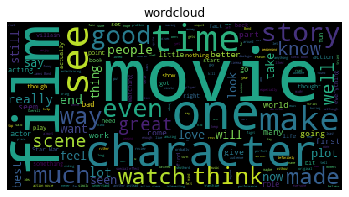

In [187]:
text = all_name
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('wordcloud')
# plt.savefig('../figures/wordcloud.png',dpi=100)
plt.show()